# Burgers_Equation

## core

In [1]:
%cd /kaggle/working/
!rm -rf /kaggle/working/dynamics
!git clone https://github.com/HuangYin0514/dynamics.git
%cd /kaggle/working/dynamics/Burgers_Equation_v1

import sys
sys.path.append('/kaggle/input/pylib-pydoe/MySitePackages')


/kaggle/working
Cloning into 'dynamics'...
remote: Enumerating objects: 801, done.
remote: Counting objects: 100% (801/801), done.
remote: Compressing objects: 100% (573/573), done.
remote: Total 801 (delta 423), reused 585 (delta 210), pack-reused 0
Receiving objects: 100% (801/801), 7.20 MiB | 14.80 MiB/s, done.
Resolving deltas: 100% (423/423), done.
/kaggle/working/dynamics/Burgers_Equation_v1


In [2]:
%%time

!python Main.py 

Adam ----> It: 0, Loss: 0.5404242277145386
Adam ----> It: 100, Loss: 0.17996051907539368
Adam ----> It: 200, Loss: 0.11218097805976868
Adam ----> It: 300, Loss: 0.09961486607789993
Adam ----> It: 400, Loss: 0.07782762497663498
Current_iter 100, Loss: 1.29155e-02, Loss_u: 7.95204e-03, Loss_f: 4.96347e-03
Current_iter 200, Loss: 4.82750e-03, Loss_u: 2.46569e-03, Loss_f: 2.36180e-03
Current_iter 300, Loss: 1.98012e-03, Loss_u: 9.61724e-04, Loss_f: 1.01839e-03
Current_iter 400, Loss: 1.11377e-03, Loss_u: 5.23710e-04, Loss_f: 5.90062e-04
Current_iter 500, Loss: 7.25202e-04, Loss_u: 3.18940e-04, Loss_f: 4.06262e-04
Current_iter 600, Loss: 5.36215e-04, Loss_u: 2.52552e-04, Loss_f: 2.83663e-04
Current_iter 700, Loss: 4.18339e-04, Loss_u: 1.60489e-04, Loss_f: 2.57850e-04
Current_iter 800, Loss: 3.44931e-04, Loss_u: 1.23989e-04, Loss_f: 2.20942e-04
Current_iter 900, Loss: 2.66330e-04, Loss_u: 9.93955e-05, Loss_f: 1.66935e-04
Current_iter 1000, Loss: 1.97971e-04, Loss_u: 6.66246e-05, Loss_f: 1.31

## Visualizations

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec


In [4]:
data = scipy.io.loadmat("data/burgers_shock.mat")
Exact = np.real(data["usol"]).T
u_star = Exact.flatten()[:, None]

n_t = 100
n_x = 256
lb = np.array([-1.0, 0.0])
ub = np.array([1.0, 1.0])  # (X,T)
t = np.linspace(lb[1], ub[1], n_t).flatten()[:, None]
x = np.linspace(lb[0], ub[0], n_x).flatten()[:, None]

data = scipy.io.loadmat("result/Burgers_Equation/pred.mat")
u_pred = np.real(data["u_pred"])
u_pred = u_pred.flatten()[:, None]
u_pred = u_pred.reshape(n_t, n_x)

X_u_train = np.real(data["X_u_train"])


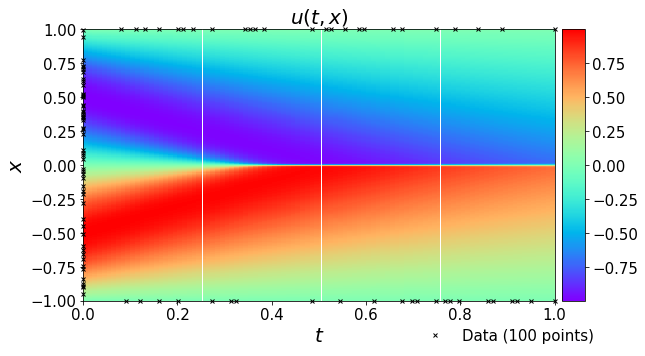

In [5]:
######################################################################
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111)
h = ax.imshow(u_pred.T, interpolation='nearest', cmap='rainbow',
              extent=[t.min(), t.max(), x.min(), x.max()],
              origin='lower', aspect='auto')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.10)
cbar = fig.colorbar(h, cax=cax)
cbar.ax.tick_params(labelsize=15)

ax.plot(
    X_u_train[:, 1],
    X_u_train[:, 0],
    'kx', label='Data (%d points)' % (X_u_train.shape[0]),
    markersize=4,  # marker size doubled
    clip_on=False,
    alpha=1.0
)

line = np.linspace(x.min(), x.max(), 2)[:, None]
ax.plot(t[25] * np.ones((2, 1)), line, 'w-', linewidth=1)
ax.plot(t[50] * np.ones((2, 1)), line, 'w-', linewidth=1)
ax.plot(t[75] * np.ones((2, 1)), line, 'w-', linewidth=1)

ax.set_xlabel('$t$', size=20)
ax.set_ylabel('$x$', size=20)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.9, -0.05),
    ncol=5,
    frameon=False,
    prop={'size': 15}
)
ax.set_title('$u(t,x)$', fontsize=20)  # font size doubled
ax.tick_params(labelsize=15)

plt.savefig("result/Burgers_Equation/pred_img.jpg")
plt.show()


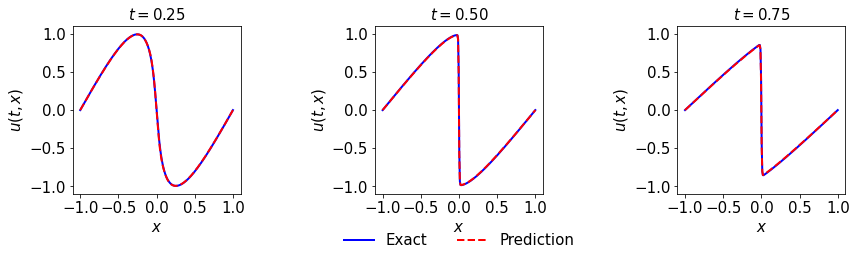

In [6]:
######################################################################
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)

gs1 = gridspec.GridSpec(1, 3)
gs1.update(top=1 - 1.0 / 3.0 - 0.1, bottom=1.0 - 2.0 / 3.0, left=0.1, right=0.9, wspace=0.5)

ax = plt.subplot(gs1[0, 0])
ax.plot(x, Exact[25, :], 'b-', linewidth=2, label='Exact')
ax.plot(x, u_pred[25, :], 'r--', linewidth=2, label='Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$u(t,x)$')
ax.set_title('$t = 0.25$', fontsize=15)
ax.axis('square')
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

ax = plt.subplot(gs1[0, 1])
ax.plot(x, Exact[50, :], 'b-', linewidth=2, label='Exact')
ax.plot(x, u_pred[50, :], 'r--', linewidth=2, label='Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$u(t,x)$')
ax.axis('square')
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_title('$t = 0.50$', fontsize=15)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=5,
    frameon=False,
    prop={'size': 15}
)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

ax = plt.subplot(gs1[0, 2])
ax.plot(x, Exact[75, :], 'b-', linewidth=2, label='Exact')
ax.plot(x, u_pred[75, :], 'r--', linewidth=2, label='Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$u(t,x)$')
ax.axis('square')
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_title('$t = 0.75$', fontsize=15)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)


plt.savefig("result/Burgers_Equation/t_time_pred.jpg")
plt.show()



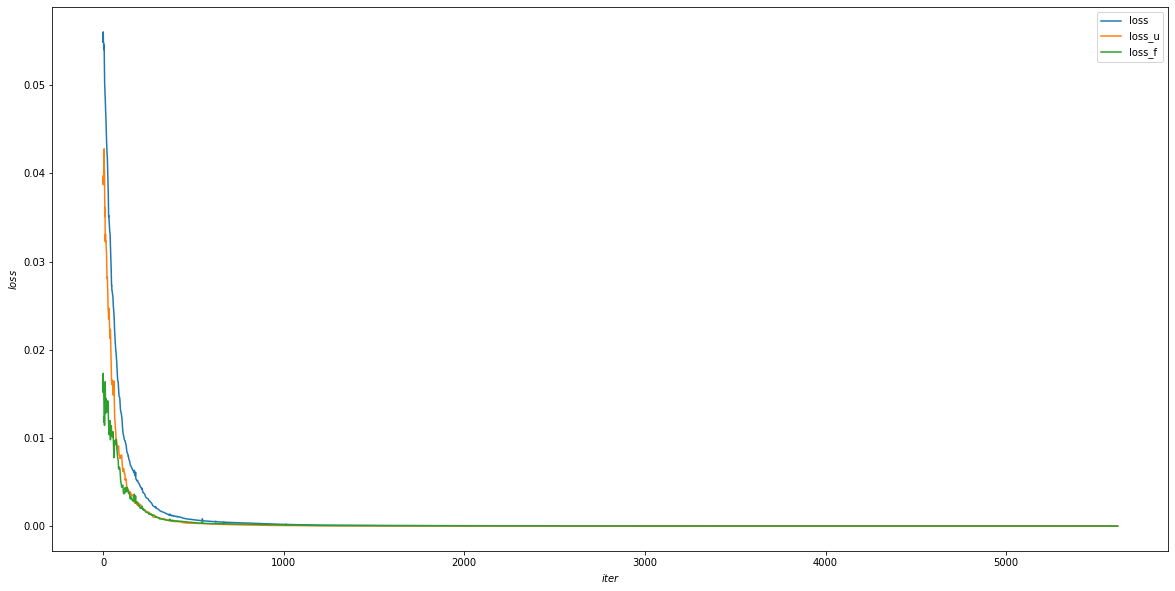

In [10]:
######################################################################
loss = np.real(data["loss"])[0]
loss_u = np.real(data["loss_u"])[0]
loss_f = np.real(data["loss_f"])[0]

show_interval = 0

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(loss[show_interval:], label="loss")
ax.plot(loss_u[show_interval:], label="loss_u")
ax.plot(loss_f[show_interval:], label="loss_f")
ax.set_xlabel('$iter$')
ax.set_ylabel('$loss$')
plt.legend()
plt.savefig("result/Burgers_Equation/loss.jpg")
plt.show()